<a href="https://colab.research.google.com/github/lismarcarolinacamacho/PYTHON/blob/main/numpy_financial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Python en finanzas

In [1]:
#variables numericas

var1= 10
var2=1000.5

In [2]:
#string

str1= 'Balance'
str2= 'Capital'



In [3]:
#Diccionarios

Dict1={}
Dict1={'Juan':10, 'Maria':20, 'Matias':50}

In [4]:
#Lista

lista =['abc',123, 5.5,'Balance']

In [5]:
#Calculo iterativo

tasa= 0.1
CASH_FLOWS=[-200,50,50,50,50,50]

VPN=0

VPN+=(CASH_FLOWS[0]/((1+tasa)**0)) #momento 0
VPN+=(CASH_FLOWS[1]/((1+tasa)**1)) #momento 1
VPN+=(CASH_FLOWS[2]/((1+tasa)**2)) #momento 2
VPN+=(CASH_FLOWS[3]/((1+tasa)**3)) #momento 3
VPN+=(CASH_FLOWS[4]/((1+tasa)**4)) #momento 4
VPN+=(CASH_FLOWS[5]/((1+tasa)**5)) #momento 5
print("El valor Presente Neto es",VPN)


#BUCLE

VPN_i=0
for i in range(len(CASH_FLOWS)):
  VPN_i += CASH_FLOWS[i]/((1+tasa)**i)
print("El valor Presente Neto es",VPN_i)

El valor Presente Neto es -10.460661529577635
El valor Presente Neto es -10.460661529577635


In [6]:
#min 27:05


In [7]:
pip install numpy_financial 

In [8]:
import numpy as np
import numpy_financial as npf


In [9]:
NVP_np=npf.npv(tasa,CASH_FLOWS)
print("El valor Presente Neto es", NVP_np)

El valor Presente Neto es -10.460661529577635


In [10]:
pip install yfinance

     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 6.4 MB 34.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


# Ejemplo de correlación

In [11]:
import yfinance as yf # libreria de YaHoo Finance
import pandas as pd
tickers = ['SPY','GLD','QQQ','VWO','XLV','VNQ','XLE','XLP','XLU']

In [12]:
precios = {}
i = 0

for ticker in tickers:
  print(f"Descargando Datos de:{ticker}|Numero:{i}/{len(tickers)}")
  precios[ticker] =yf.download(ticker, period='10y')
  i+=1


Descargando Datos de:SPY|Numero:0/9
[*********************100%***********************]  1 of 1 completed
Descargando Datos de:GLD|Numero:1/9
[*********************100%***********************]  1 of 1 completed
Descargando Datos de:QQQ|Numero:2/9
[*********************100%***********************]  1 of 1 completed
Descargando Datos de:VWO|Numero:3/9
[*********************100%***********************]  1 of 1 completed
Descargando Datos de:XLV|Numero:4/9
[*********************100%***********************]  1 of 1 completed
Descargando Datos de:VNQ|Numero:5/9
[*********************100%***********************]  1 of 1 completed
Descargando Datos de:XLE|Numero:6/9
[*********************100%***********************]  1 of 1 completed
Descargando Datos de:XLP|Numero:7/9
[*********************100%***********************]  1 of 1 completed
Descargando Datos de:XLU|Numero:8/9
[*********************100%***********************]  1 of 1 completed


In [13]:
#ejemplo de datos: apertura, maximo, minimo,cierre y volumen
print(precios[tickers[0]])

                  Open        High  ...   Adj Close     Volume
Date                                ...                       
2012-02-16  134.570007  136.169998  ...  112.336594  186567800
2012-02-17  136.520004  136.630005  ...  112.633842  129869400
2012-02-21  136.729996  137.050003  ...  112.683418  134042300
2012-02-22  136.259995  136.550003  ...  112.320068  124455300
2012-02-23  135.960007  136.729996  ...  112.815506  137704300
...                ...         ...  ...         ...        ...
2022-02-10  451.339996  457.709991  ...  449.320007  140103700
2022-02-11  449.410004  451.609985  ...  440.459991  153064100
2022-02-14  439.920013  441.600006  ...  439.019989  122062800
2022-02-15  443.730011  446.279999  ...  446.100006   88482700
2022-02-16  443.929993  444.809998  ...  443.312805   29471923

[2518 rows x 6 columns]


In [14]:
#min 30:49

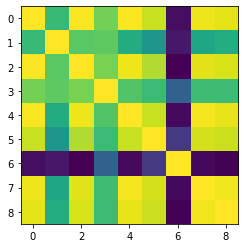

In [44]:
# precios de cierre en un mismo dataframe

fechas = precios[tickers[0]].index
dataframe_cierre = pd.DataFrame(index=fechas)

for ticker in tickers:
  dataframe_cierre[ticker] = precios[ticker]['Close']

#calculo de correlaciones

correlations = dataframe_cierre.corr(method= 'pearson')

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
im = ax.imshow(correlations)

In [20]:
dataframe_cierre.to_excel('dataframe_cierre.xlsx')
# se muestran los datos ordenados no como en csv que es un desastre

In [21]:
correlations.to_excel('correlacion.xlsx')




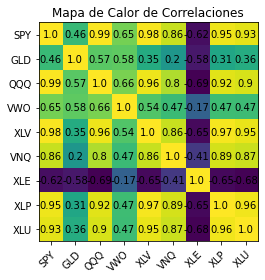

In [47]:
#plot

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
im = ax.imshow(correlations)
# mostrar tickers
ax.set_xticks(np.arange(len(tickers)))
ax.set_yticks(np.arange(len(tickers)))

#label
ax.set_xticklabels(tickers)
ax.set_yticklabels(tickers)

# rotar tick label 
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

#crear anotaciones de texto
for i in range(len(tickers)):
  for j in range(len(tickers)):
    text= ax.text(j,i, round(correlations.loc[tickers[i]][tickers[j]],2),
    ha="center", va="center", color="black")
ax.set_title("Mapa de Calor de Correlaciones")
fig.tight_layout()
plt.show()


In [46]:
correlations.to_excel('correlacion2.xlsx')

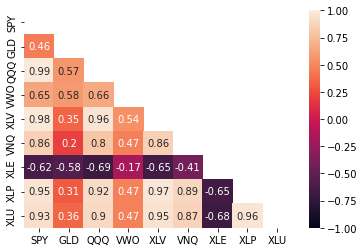

In [49]:
#este grafico se entiende mejor...
from seaborn.matrix import heatmap
import seaborn as sns
mask =np.triu(np.ones_like(correlations, dtype=bool))
heatmap=sns.heatmap(correlations,mask=mask,vmin=-1,vmax=1,annot=True)

In [57]:
#min35:45


In [56]:
pip install requests

In [105]:
import requests
URL_API ='https://test-algobalanz.herokuapp.com/api/v1/prices'
URL_API_AND = 'https://test-algobalanz.herokuapp.com/api/v1/prices/security_id'

req= requests.get(URL_API)
req_json= req.json()


In [106]:
req_json

{'AL30-0001-C-CT-ARS': {'Bid': [5680.0, 5603.0, 5600.0, 5598.0, 5580.0],
  'BidSize': [5102.0, 1233.0, 9976.0, 1440.0, 3049.0],
  'Offer': [5750.0, 5799.0, 5822.0, 5900.0, 6090.0],
  'OfferSize': [1000.0, 254.0, 21500.0, 16.0, 1000.0],
  'currency': 'ARS',
  'last': {'price': 0.0, 'size': 0, 'time': ''},
  'mdReqID': 'MD-20210702-262120',
  'securityID': 'AL30-0001-C-CT-ARS',
  'settlementType': 'CI',
  'symbol': 'AL30',
  'tradeVolume': {'price': -1.0, 'size': -1, 'time': ''},
  'underlying': None},
 'AL30-0002-C-CT-ARS': {'Bid': [5581.0, 5580.0, -1.0, -1.0, -1.0],
  'BidSize': [55177.0, 100000.0, -1, -1, -1],
  'Offer': [5600.0, 5998.0, -1.0, -1.0, -1.0],
  'OfferSize': [150.0, 15000.0, -1, -1, -1],
  'currency': 'ARS',
  'last': {'price': 0.0, 'size': 0, 'time': ''},
  'mdReqID': 'MD-20210702-262341',
  'securityID': 'AL30-0002-C-CT-ARS',
  'settlementType': '24hs',
  'symbol': 'AL30',
  'tradeVolume': {'price': -1.0, 'size': -1, 'time': ''},
  'underlying': None},
 'AL30-0003-C-CT-

In [68]:
                #ticker-plazo-moneda
print(req_json['AL30-0002-C-CT-ARS'])



{'securityID': 'AL30-0002-C-CT-ARS', 'mdReqID': 'MD-20210702-262341', 'currency': 'ARS', 'symbol': 'AL30', 'Bid': [5580.0, -1.0, -1.0, -1.0, -1.0], 'BidSize': [100000.0, -1, -1, -1, -1], 'Offer': [5680.0, 5998.0, -1.0, -1.0, -1.0], 'OfferSize': [2000.0, 15000.0, -1, -1, -1], 'last': {'price': 0.0, 'size': 0, 'time': ''}, 'underlying': None, 'tradeVolume': {'price': -1.0, 'size': -1, 'time': ''}, 'settlementType': '24hs'}


In [94]:
# IDENTIFICAR ESPECIES : FUNCIONES

def ConstruirIdentificador(ticker,plazo,moneda):
#plazo
  if plazo == 'CI':
    pl='0001'
  elif plazo == '24hs':
    pl='0002'
  elif plazo == '48hs':
    pl='0003'
#moneda
  if moneda == 'USD':
    ticker=ticker+'D'
  elif moneda == 'EXT':
    ticker=ticker+'C'
  string_id = ticker+'-'+pl+'-C-CT-'+moneda
  return string_id


In [107]:
#construimos los strings
AL30_T2 = ConstruirIdentificador('AL30','48hs','ARS')
AL30D_T2 = ConstruirIdentificador('AL30','48hs','USD')
AL30C_T2 = ConstruirIdentificador('AL30','48hs','EXT')

In [108]:
print(req_json[AL30D_T2])

{'securityID': 'AL30D-0003-C-CT-USD', 'mdReqID': 'MD-20210702-262613', 'currency': 'USD', 'symbol': 'AL30D', 'Bid': [34.0, 33.85, 33.8, 33.75, 33.61], 'BidSize': [25000.0, 13.0, 7396.0, 3000.0, 15000.0], 'Offer': [33.3, 33.4, 33.5, 33.55, 33.6], 'OfferSize': [2001.0, 1473.0, 8100.0, 500.0, 20508.0], 'last': {'price': 0.0, 'size': 0, 'time': ''}, 'underlying': None, 'tradeVolume': {'price': -1.0, 'size': -1, 'time': ''}, 'settlementType': '48hs'}


In [110]:
#ACCEDER AL PRECIO DE LAS PUNTAS
ask_pesos = req_json[AL30_T2]['Bid'][0]
bid_usd = req_json[AL30D_T2]['Offer'][0]
bid_ccl = req_json[AL30C_T2]['Offer'][0]

In [113]:
#calculo

DOLAR_MEP = ask_pesos/bid_usd
DOLAR_CCL = ask_pesos/bid_ccl
print (f" Dolar MEP: {round(DOLAR_MEP,2)} | Dolar CCL: {round(DOLAR_CCL,2)}")

 Dolar MEP: 170.57 | Dolar CCL: 168.75


In [114]:
pip install teepy

     |████████████████████████████████| 56 kB 3.5 MB/s 
     |████████████████████████████████| 79.6 MB 5.9 kB/s 
     |████████████████████████████████| 209 kB 53.1 MB/s 
     |████████████████████████████████| 83 kB 1.6 MB/s 
     |████████████████████████████████| 149 kB 47.3 MB/s 
     |████████████████████████████████| 138 kB 53.6 MB/s 
     |████████████████████████████████| 111 kB 52.3 MB/s 
  Created wheel for teepy: filename=teepy-0.3.6-py3-none-any.whl size=56743 sha256=87b0d6329daad1b7ad62f6ede0a8a446f615921130dd11b7eee267652dc98f2b
  Stored in directory: /root/.cache/pip/wheels/47/47/99/d08c468bd4ce37c024b10313dd091564831a4f6fdfc0af229b
Successfully built teepy
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following depend

In [ ]:
# BOT PARA TWITTER

